*Creado por:*

*Isabel Maniega*

# VAEX y DASK

Objetivos:
* Aprender más sobre VAEX y DASK

# Tabla de contenidos:
1. [Profundizando en DASK](#profundizando)
    1. [Lectura de datos películas](#peliculas)
    2. [Lectura de datos valoraciones](#valoraciones)
    3. [Lectura de datos etiquetas)](#etiquetas)
    4. [Combinación de datos](#combinacion)
    5. [Valoraciones por año](#valoraciones-anio)
    6. [Etiquetas más valoradas](#etiquetas-valoradas)
    7. [Top usuarios con más valoraciones por tags](#top-usuarios)

## Profundizando en DASK <a class="anchor" name="profundizando"></a>
Para este apartado trabajaré con el dataset de Movielens, que contiene información sobre películas y valoraciones de usuarios.

In [1]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt

### Lectura de datos películas <a class="anchor" name="peliculas"></a>

In [2]:
df_movies: dd.DataFrame = dd.read_csv('movies_data/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Lectura de datos valoraciones <a class="anchor" name="valoraciones"></a>

In [3]:
df_ratings: dd.DataFrame = dd.read_csv('movies_data/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


### Lectura de datos etiquetas <a class="anchor" name="etiquetas"></a>

In [4]:
df_tags: dd.DataFrame = dd.read_csv('movies_data/tags.csv')
df_tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


### Combinación de datos <a class="anchor" name="combinacion"></a>

In [5]:
# Merge the three dataframes
df_mov_rat: dd.DataFrame = df_ratings.merge(df_movies, on='movieId', how='left')
df_movielens: dd.DataFrame = df_mov_rat.merge(df_tags, on=['userId', 'movieId'], how='left')
# rename timestamp_x to rating_timestamp and timestamp_y to tag_timestamp
df_movielens: dd.DataFrame = df_movielens.rename(columns={'timestamp_x': 'rating_timestamp', 'timestamp_y': 'tag_timestamp'})
df_movielens["rating_timestamp"] = dd.to_datetime(df_movielens["rating_timestamp"], unit='s', origin='unix')
df_movielens["tag_timestamp"] = dd.to_datetime(df_movielens["tag_timestamp"], unit='s', origin='unix')
df_movielens.head()

,userId,movieId,rating,rating_timestamp,title,genres,tag,tag_timestamp
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaT
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,NaN,NaT
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,NaN,NaT
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaT
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaT


### Valoraciones por año <a class="anchor" name="valoraciones-anio"></a>

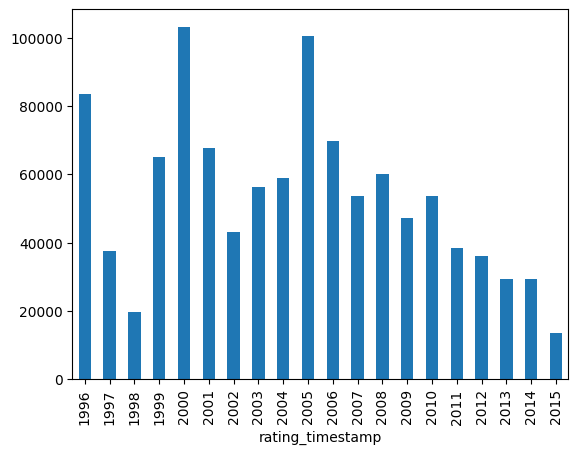

In [6]:
# plot the number of ratings per year
df_movielens.groupby(df_movielens.rating_timestamp.dt.year)\
    .rating\
    .count()\
    .compute()\
    .plot(kind='bar')
plt.show()

### Etiquetas más valoradas <a class="anchor" name="etiquetas-valoradas"></a>

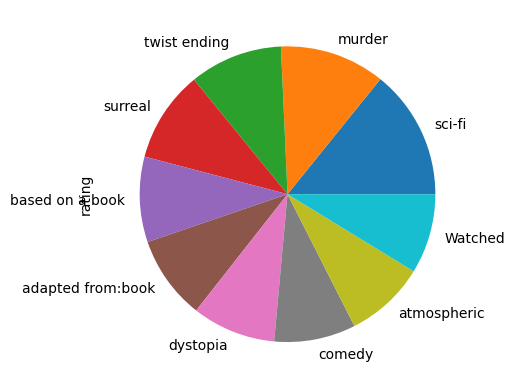

In [8]:
# plot the top tags rated by users as pie
df_movielens.groupby('tag')\
    .rating\
    .count()\
    .nlargest(10)\
    .compute()\
    .plot(kind='pie')
plt.show()

### Top usuarios con más valoraciones por tags <a class="anchor" name="top-usuarios"></a>

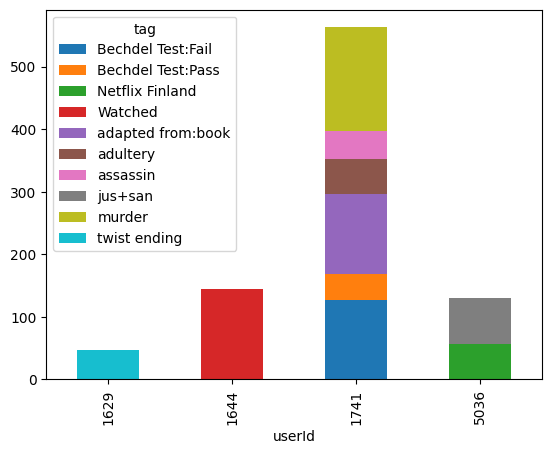

In [9]:
# plot the top 10 users who rated the most movies with the legend as the tag
df_movielens[['userId', 'tag', 'rating']]\
    .groupby(['userId', 'tag'])\
    .rating\
    .count()\
    .nlargest(10)\
    .compute()\
    .unstack()\
    .plot(kind='bar', stacked=True)
plt.show()

*Creado por:*

*Isabel Maniega*